In [114]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [70]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/priorbank/pay/",
    label_mode = "categorical",
    image_size = (256,256),
    subset="both",
    validation_split=0.3,
    seed=1
)

Found 5975 files belonging to 10 classes.
Using 4183 files for training.
Using 1792 files for validation.


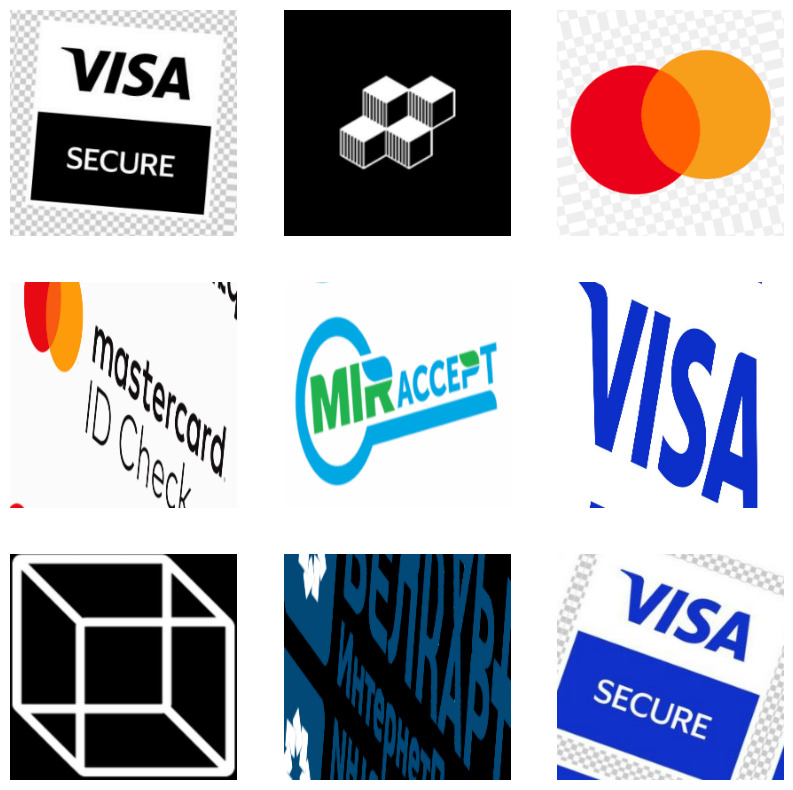

In [71]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.axis("off")

In [4]:
model_base = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet")

model_base.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [72]:
inputs = keras.layers.Input(shape=(None,None,3))
resizing_layer = keras.layers.Resizing(100,100)
x = resizing_layer(inputs)
x = keras.applications.resnet.preprocess_input(x)

x = model_base(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resizing_3          │ (None, 100, 100,  │          0 │ input_layer_4[0]… │
│ (Resizing)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_9          │ (None, 100, 100)  │          0 │ resizing_3[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_10         │ (None, 100, 100)  │          0 │ resizing_3[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_11         │ (None, 100, 100)  │          0 │ resizing_3[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_3 (Stack)     │ (None, 100, 100,  │          0 │ get_item_9[0][0], │
│                     │ 3)                │            │ get_item_10[0][0… │
│                     │                   │            │ get_item_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 100, 100,  │          0 │ stack_3[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 4, 4,      │ 23,587,712 │ add_3[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[3][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │     20,490 │ flatten_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [91]:
history = model.fit(train_ds, batch_size=32,
                   epochs=20, validation_data=val_ds)

Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 36s 276ms/step - accuracy: 1.0000 - loss: 6.9825e-06 - val_accuracy: 1.0000 - val_loss: 1.6232e-05
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 36s 272ms/step - accuracy: 1.0000 - loss: 6.6123e-06 - val_accuracy: 1.0000 - val_loss: 1.5323e-05
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 36s 272ms/step - accuracy: 1.0000 - loss: 6.1011e-06 - val_accuracy: 1.0000 - val_loss: 1.4523e-05
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 37s 279ms/step - accuracy: 1.0000 - loss: 5.8047e-06 - val_accuracy: 1.0000 - val_loss: 1.3742e-05
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 36s 273ms/step - accuracy: 1.0000 - loss: 5.3945e-06 - val_accuracy: 1.0000 - val_loss: 1.2980e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 46s 350ms/step - accuracy: 1.0000 - loss: 4.8781e-06 - val_accuracy: 1.0000 - val_loss: 1.2263e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 36s 275ms/step - accuracy: 1.0000 - loss: 4.5885e-06 - val_accuracy: 1.0000 - val_loss: 1.1615e-05
Epoch 8/20
131/131 ━━━━━━━━

In [123]:
#model = tf.keras.models.load_model("/kaggle/working/resnet.keras")

In [8]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/common-mobile-web-app-icons",
    labels = None
)

Found 306756 files.


In [119]:
results = test.predict(test_ds)

9587/9587 ━━━━━━━━━━━━━━━━━━━━ 173s 18ms/step


In [120]:
results_df = pd.DataFrame(data={"Prediction": np.argmax(results, axis=1),
                               "True": 4})

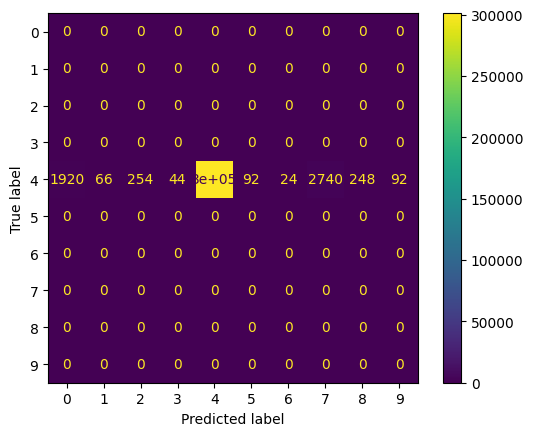

In [121]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(results_df["True"], results_df["Prediction"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1

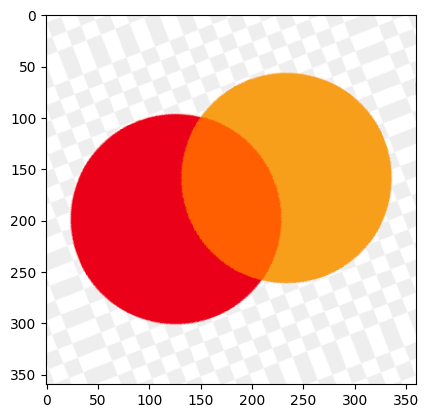

In [122]:
img = keras.utils.load_img("/kaggle/input/priorbank/pay/MasterCard/1 - Copy (11) - Copy.png")
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)

predictions = model.predict(img_array)
np.argmax(predictions)